In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True)

LEN = 5000
indices = np.random.permutation(LEN)
X = X.loc[indices, :]

X.shape

(5000, 784)

In [ ]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS

X_red = X.copy()
tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_red)

LLE = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = LLE.fit_transform(X_red)

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_red)

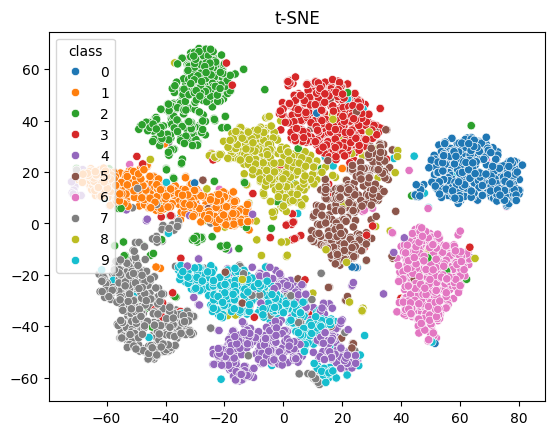

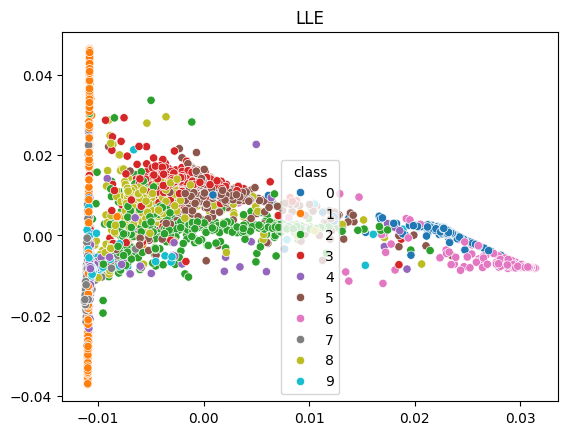

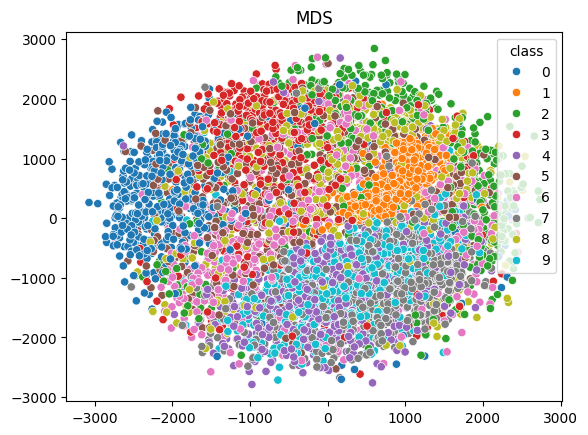

In [ ]:
y = y[indices]
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y)
plt.title("t-SNE")
plt.show()

sns.scatterplot(x=X_lle[:,0], y=X_lle[:,1], hue=y)
plt.title("LLE")
plt.show()

sns.scatterplot(x=X_mds[:,0], y=X_mds[:,1], hue=y)
plt.title("MDS")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

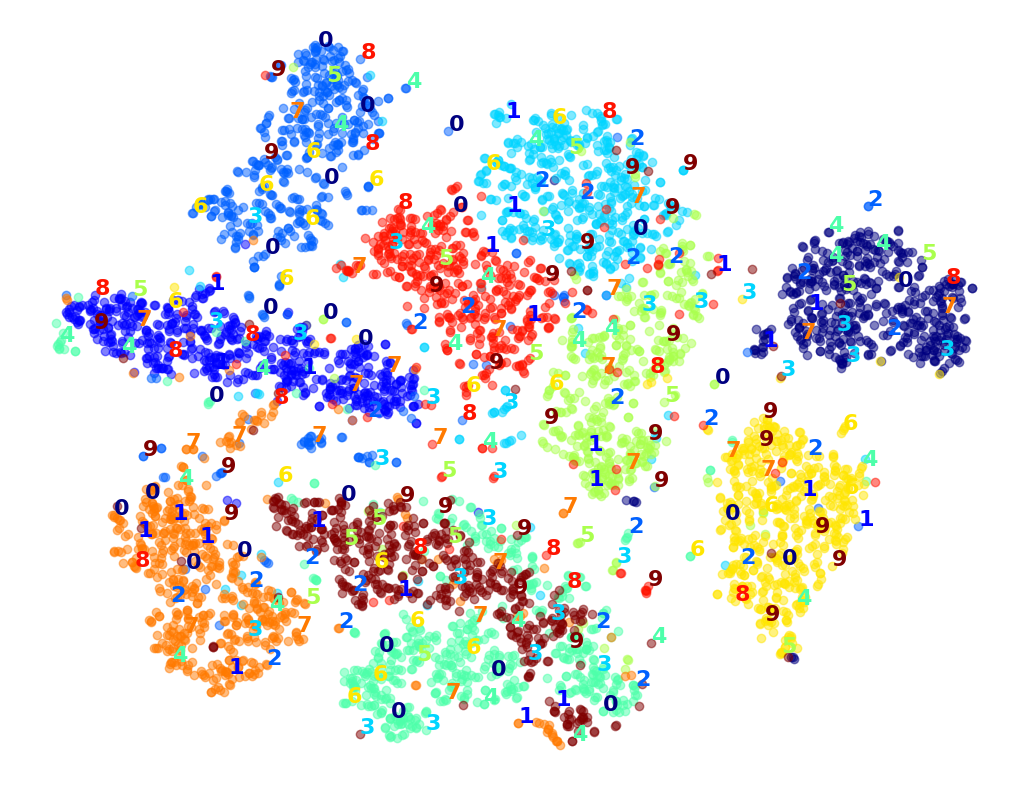

In [ ]:
plot_digits(X_tsne, y)

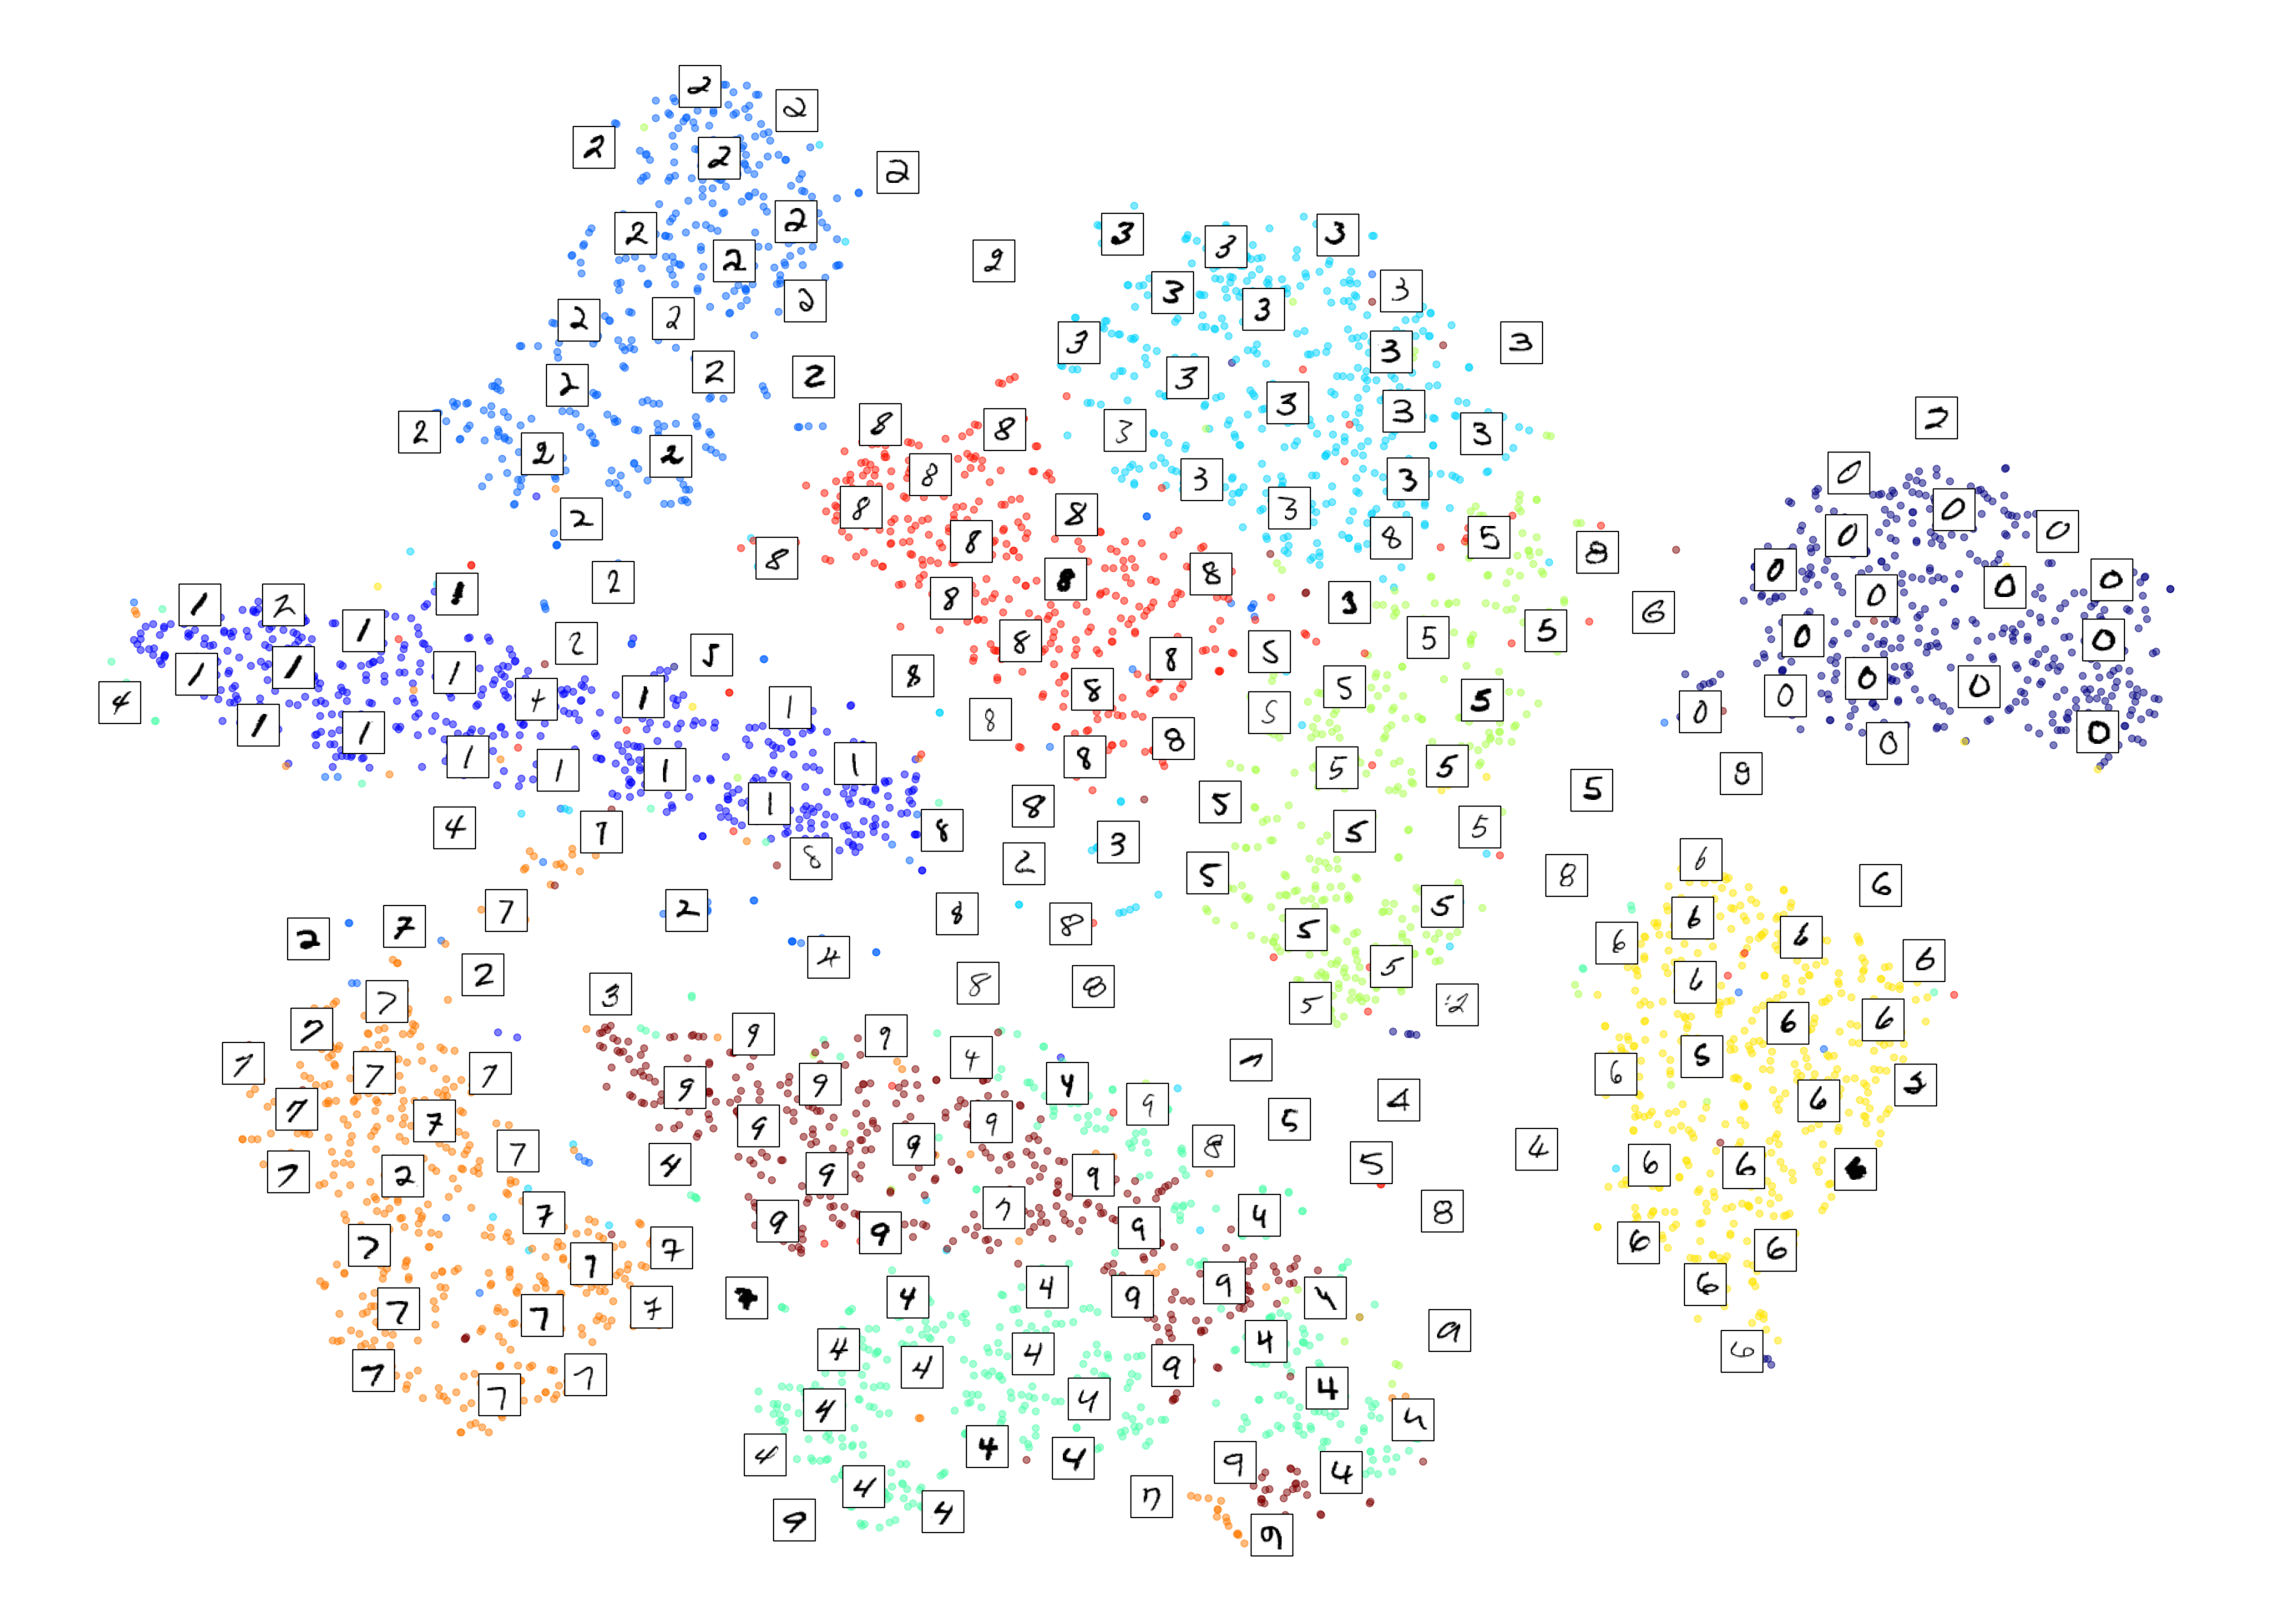

In [ ]:
plot_digits(X_tsne, y, images=X.to_numpy(), figsize=(35, 25))